# Datascience Project (University ranking)

<div class="alert alert-block alert-info"><b> Import libraries. </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import pycountry_convert as pc
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from random import randint

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info"> <b> Import Datasets </div>

In [2]:
# import file
data = pd.read_csv ('university_datasets.csv', encoding= 'unicode_escape')
data

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

In [3]:
# creat dataset
df = pd.DataFrame (data)
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

<div class="alert alert-block alert-info"> <b> Preprocesing </div>

In [4]:
df.columns.tolist()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality\xa0of Education',
 'Alumni Employment',
 'Quality\xa0of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

In [5]:
new_columns_names = ["Quality of Education", "Quality of Faculty"]
dic = {"Quality\xa0of Education": new_columns_names[0], "Quality\xa0of Faculty": new_columns_names[1]}
df = df.rename(columns=dic)

In [6]:
df.columns.tolist()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality of Education',
 'Alumni Employment',
 'Quality of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

In [7]:
# information about dataset
df.describe(include="all")

World Rank         Institution Location  National Rank  \
count   1000.000000                1000     1000     1000.00000   
unique          NaN                1000       61            NaN   
top             NaN  Harvard University      USA            NaN   
freq            NaN                   1      213            NaN   
mean     500.500000                 NaN      NaN       40.02300   
std      288.819436                 NaN      NaN       49.22871   
min        1.000000                 NaN      NaN        1.00000   
25%      250.750000                 NaN      NaN        6.00000   
50%      500.500000                 NaN      NaN       21.00000   
75%      750.250000                 NaN      NaN       51.00000   
max     1000.000000                 NaN      NaN      213.00000   

       Quality of Education Alumni Employment Quality of Faculty  \
count                  1000              1000               1000   
unique                  404               492                221   
top                       -            > 1000                  -   
freq                    597               509                731   
mean                    NaN               NaN                NaN   
std                     NaN               NaN                NaN   
min                     NaN               NaN                NaN   
25%                     NaN               NaN                NaN   
50%                     NaN               NaN                NaN   
75%                     NaN               NaN                NaN   
max                     NaN               NaN                NaN   

       Research Output Quality Publications Influence Citations        Score  
count             1000                 1000      1000      1000  1000.000000  
unique             905                  892       830        75          NaN  
top             > 1000               > 1000    > 1000       898          NaN  
freq                77                   51       171       129          NaN  
mean               NaN                  NaN       NaN       NaN    75.034300  
std                NaN                  NaN       NaN       NaN     4.670858  
min                NaN                  NaN       NaN       NaN    69.800000  
25%                NaN                  NaN       NaN       NaN    71.500000  
50%                NaN                  NaN       NaN       NaN    73.750000  
75%                NaN                  NaN       NaN       NaN    77.300000  
max                NaN                  NaN       NaN       NaN   100.000000

In [8]:
#check for "-" values
for col in df.columns :
    print(col,' : ','-' in set(df[col]))


World Rank  :  False
Institution  :  False
Location  :  False
National Rank  :  False
Quality of Education  :  True
Alumni Employment  :  False
Quality of Faculty  :  True
Research Output  :  False
Quality Publications  :  False
Influence  :  False
Citations  :  False
Score  :  False


In [9]:
#a closer look at the values - 
QE = df[df["Quality of Education"]=="-"]
print("Max Score in dataframe : ",QE.Score.max())
print("Min Score in dataframe : ",QE.Score.min())
print("Max World Rank in dataframe : ",QE["World Rank"].max())
print("Min World Rank in dataframe : ",QE["World Rank"].min())
QE

Max Score in dataframe :  87.7
Min Score in dataframe :  69.8
Max World Rank in dataframe :  1000
Min World Rank in dataframe :  22


World Rank                                    Institution     Location  \
21           22        University of California, San Francisco          USA   
59           60                      Seoul National University  South Korea   
79           80                               Emory University          USA   
88           89  University of Texas MD Anderson Cancer Center          USA   
93           94                     Baylor College of Medicine          USA   
..          ...                                            ...          ...   
994         995                            University of Macau        Macau   
995         996                            Aga Khan University     Pakistan   
997         998                               K?chi University        Japan   
998         999                       Soonchunhyang University  South Korea   
999        1000                      Capital Normal University        China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
21              17                    -            > 1000                 13   
59               1                    -                20                  -   
79              47                    -               197                164   
88              49                    -            > 1000                 91   
93              51                    -            > 1000                141   
..             ...                  ...               ...                ...   
994              1                    -               512                  -   
995              3                    -            > 1000                  -   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
21               45                   23         8        17   87.7  
59               19                   39       146       129   83.7  
79              101                   66        55        63   82.5  
88              158                  104        70        66   82.0  
93              161                  118        38        53   81.8  
..              ...                  ...       ...       ...    ...  
994             883                  816    > 1000    > 1000   69.8  
995          > 1000               > 1000       464       673   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[597 rows x 12 columns]

In [10]:
dfQualityF = df[df["Quality of Faculty"]=="-"]
print("Max Score in dataframe : ",dfQualityF.Score.max())
print("Min Score in dataframe : ",dfQualityF.Score.min())
print("Max World Rank in dataframe : ",dfQualityF["World Rank"].max())
print("Min World Rank in dataframe : ",dfQualityF["World Rank"].min())
dfQualityF

Max Score in dataframe :  83.7
Min Score in dataframe :  69.8
Max World Rank in dataframe :  1000
Min World Rank in dataframe :  60


World Rank                       Institution     Location  National Rank  \
59           60         Seoul National University  South Korea              1   
72           73          University of Pittsburgh          USA             43   
91           92                 Peking University        China              1   
97           98               Tsinghua University        China              2   
102         103  National University of Singapore    Singapore              1   
..          ...                               ...          ...            ...   
994         995               University of Macau        Macau              1   
995         996               Aga Khan University     Pakistan              3   
997         998                  K?chi University        Japan             56   
998         999          Soonchunhyang University  South Korea             35   
999        1000         Capital Normal University        China            108   

    Quality of Education Alumni Employment Quality of Faculty Research Output  \
59                     -                20                  -              19   
72                   187               233                  -              34   
91                   340                67                  -              23   
97                   586               109                  -              22   
102                    -               148                  -              38   
..                   ...               ...                ...             ...   
994                    -               512                  -             883   
995                    -            > 1000                  -          > 1000   
997                    -            > 1000                  -          > 1000   
998                    -            > 1000                  -             881   
999                    -               869                  -             923   

    Quality Publications Influence Citations  Score  
59                    39       146       129   83.7  
72                    25        47        18   82.9  
91                    38        88       167   81.9  
97                    41        96       108   81.6  
102                   32        94        85   81.4  
..                   ...       ...       ...    ...  
994                  816    > 1000    > 1000   69.8  
995               > 1000       464       673   69.8  
997               > 1000       811       673   69.8  
998               > 1000    > 1000       898   69.8  
999                  904       889    > 1000   69.8  

[731 rows x 12 columns]

In [11]:
df[(df["Quality of Faculty"]=="-") &(df["Quality of Education"]=="-")]

World Rank                              Institution     Location  \
59           60                Seoul National University  South Korea   
102         103         National University of Singapore    Singapore   
106         107                                KU Leuven      Belgium   
126         127                  VU University Amsterdam  Netherlands   
152         153  Icahn School of Medicine at Mount Sinai          USA   
..          ...                                      ...          ...   
994         995                      University of Macau        Macau   
995         996                      Aga Khan University     Pakistan   
997         998                         K?chi University        Japan   
998         999                 Soonchunhyang University  South Korea   
999        1000                Capital Normal University        China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
59               1                    -                20                  -   
102              1                    -               148                  -   
106              2                    -               429                  -   
126              6                    -               984                  -   
152             65                    -            > 1000                  -   
..             ...                  ...               ...                ...   
994              1                    -               512                  -   
995              3                    -            > 1000                  -   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
59               19                   39       146       129   83.7  
102              38                   32        94        85   81.4  
106              48                   47        84        66   81.2  
126              91                   71       132        44   80.5  
152             202                  145        59       101   79.6  
..              ...                  ...       ...       ...    ...  
994             883                  816    > 1000    > 1000   69.8  
995          > 1000               > 1000       464       673   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[551 rows x 12 columns]

After various investigations, we come to the conclusion that the best way to fill in dashed values is to use one greater than the largest number in that column.

In [12]:
#Change > 1000 to 1001
df.replace("> 1000",'1001',inplace=True)
#Chnage - to max+1 
df["Quality of Education"].replace('-','667',inplace=True)
df["Quality of Faculty"].replace('-','304',inplace=True)

In [13]:
for col in df.drop(columns=['Institution','Location','Score']):#Drop the columns that we don't want to retype
    df[col]=df[col].astype(np.int64)

###### 

In [14]:
df.shape

(1000, 12)

In [15]:
#Remove missing values
df.dropna()

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667               1001   
996             17                   353                716   
997             56                   667               1001   
998             35                   667               1001   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                  1001        464   
996                 296              798                   966       1001   
997                 304             1001                  1001        811   
998                 304              881                  1001       1001   
999                 304              923                   904        889   

     Citations  Score  
0            1  100.0  
1            2   96.7  
2            6   95.1  
3           19   94.0  
4            4   93.2  
..         ...    ...  
995        673   69.8  
996       1001   69.8  
997        673   69.8  
998        898   69.8  
999       1001   69.8  

[1000 rows x 12 columns]

In [16]:
# Add name of continent 
df['Continent']=np.NaN
for i in range(len(df)):
    country_code = pc.country_name_to_country_alpha2(df.Location.iloc[i], cn_name_format="default")
    df['Continent'].iloc[i] = pc.country_alpha2_to_continent_code(country_code)

In [17]:
df.Continent.replace ( {'NA': 'North America','SA': 'South America', 'AS': 'Asia','OC': 'Australia','AF': 'Africa',
                      'EU': 'Europe'},inplace=True)

In [18]:
# Add iso name for plot
df['Country']= np.NaN

def alpha3(input):
    
    input_countries = [input]

    countries = {}
    for country in pycountry.countries:
        countries[country.name] = country.alpha_3
        for country in input_countries:
            codes = countries.get(country, input) 

    return(codes)  

for i in range(len(df)):
    df["Country"].iloc[i] = alpha3(df.Location.iloc[i])
    


In [19]:
df['Country'].replace({"South Korea":"KOR", "Taiwan":"TWN","Russia":"RUS",
                    "Czech Republic":"CZE","Iran":"IRN","Slovak Republic":"SVK","Macau":"MAC"},inplace=True)

In [20]:
# Add longitude and lattitude
df["Longitude"]=np.NaN
df["Latitude"]=np.NaN
geolocator = Nominatim(user_agent="koosha")
for i in range(len(df)):
    try:
        Loc = df.Location.iloc[i]+","+df.Institution.iloc[i]
        address=geolocator.geocode(Loc)
        df["Latitude"].iloc[i]=address.latitude
        df["Longitude"].iloc[i]=address.longitude
    
    except:
        Loc= df.Location.iloc[i]
        address=geolocator.geocode(Loc)
        df["Latitude"].iloc[i]=address.latitude
        df["Longitude"].iloc[i]=address.longitude


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   int64  
 5   Alumni Employment     1000 non-null   int64  
 6   Quality of Faculty    1000 non-null   int64  
 7   Research Output       1000 non-null   int64  
 8   Quality Publications  1000 non-null   int64  
 9   Influence             1000 non-null   int64  
 10  Citations             1000 non-null   int64  
 11  Score                 1000 non-null   float64
 12  Continent             1000 non-null   object 
 13  Country               1000 non-null   object 
 14  Longitude             1000 non-null   float64
 15  Latitude              

In [22]:
df.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
Continent               0
Country                 0
Longitude               0
Latitude                0
dtype: int64

In [23]:
df.describe(include='all').T

count unique                 top freq       mean  \
World Rank            1000.0    NaN                 NaN  NaN      500.5   
Institution             1000   1000  Harvard University    1        NaN   
Location                1000     61                 USA  213        NaN   
National Rank         1000.0    NaN                 NaN  NaN     40.023   
Quality of Education  1000.0    NaN                 NaN  NaN    528.532   
Alumni Employment     1000.0    NaN                 NaN  NaN    726.528   
Quality of Faculty    1000.0    NaN                 NaN  NaN     261.18   
Research Output       1000.0    NaN                 NaN  NaN    508.454   
Quality Publications  1000.0    NaN                 NaN  NaN    503.003   
Influence             1000.0    NaN                 NaN  NaN    529.156   
Citations             1000.0    NaN                 NaN  NaN    501.159   
Score                 1000.0    NaN                 NaN  NaN    75.0343   
Continent               1000      6              Europe  388        NaN   
Country                 1000     61                 USA  213        NaN   
Longitude             1000.0    NaN                 NaN  NaN  11.285116   
Latitude              1000.0    NaN                 NaN  NaN   35.91163   

                             std         min        25%       50%         75%  \
World Rank            288.819436         1.0     250.75     500.5      750.25   
Institution                  NaN         NaN        NaN       NaN         NaN   
Location                     NaN         NaN        NaN       NaN         NaN   
National Rank           49.22871         1.0        6.0      21.0        51.0   
Quality of Education  208.781322         1.0     405.75     667.0       667.0   
Alumni Employment     343.686144         1.0     425.75    1001.0      1001.0   
Quality of Faculty     84.233419         1.0     282.75     304.0       304.0   
Research Output       300.080433         1.0     250.75     500.5      754.25   
Quality Publications  292.854863         1.0     250.75     500.5      750.25   
Influence             322.419239         1.0     250.75     502.5      814.75   
Citations             308.874517         1.0      240.0     460.0       673.0   
Score                   4.670858        69.8       71.5     73.75        77.3   
Continent                    NaN         NaN        NaN       NaN         NaN   
Country                      NaN         NaN        NaN       NaN         NaN   
Longitude              81.228481 -157.818692 -73.605486  6.186375  100.813547   
Latitude               19.751041  -45.864979  33.434345  39.78373   46.603354   

                            max  
World Rank               1000.0  
Institution                 NaN  
Location                    NaN  
National Rank             213.0  
Quality of Education      667.0  
Alumni Employment        1001.0  
Quality of Faculty        304.0  
Research Output          1001.0  
Quality Publications     1001.0  
Influence                1001.0  
Citations                1001.0  
Score                     100.0  
Continent                   NaN  
Country                     NaN  
Longitude              175.6165  
Latitude              69.681907

In [24]:
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667               1001   
996             17                   353                716   
997             56                   667               1001   
998             35                   667               1001   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                  1001        464   
996                 296              798                   966       1001   
997                 304             1001                  1001        811   
998                 304              881                  1001       1001   
999                 304              923                   904        889   

     Citations  Score      Continent Country   Longitude   Latitude  
0            1  100.0  North America     USA  -71.126782  42.367909  
1            2   96.7  North America     USA -122.169365  37.431314  
2            6   95.1  North America     USA  -71.096627  42.358253  
3           19   94.0         Europe     GBR    0.092005  52.210946  
4            4   93.2         Europe     GBR   -1.255668  51.758708  
..         ...    ...            ...     ...         ...        ...  
995        673   69.8           Asia     PAK   67.062022  24.923236  
996       1001   69.8           Asia     IND   88.344753  22.484733  
997        673   69.8           Asia     JPN  140.150724  39.731343  
998        898   69.8           Asia     KOR  126.931634  36.769988  
999       1001   69.8           Asia     CHN  116.300055  39.928866  

[1000 rows x 16 columns]

In [25]:
col = df.pop('Score')
df.insert(len(df.columns), 'Score', col)

<div class="alert alert-block alert-info"> <b> Visualization </div>

In [26]:
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667               1001   
996             17                   353                716   
997             56                   667               1001   
998             35                   667               1001   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                  1001        464   
996                 296              798                   966       1001   
997                 304             1001                  1001        811   
998                 304              881                  1001       1001   
999                 304              923                   904        889   

     Citations      Continent Country   Longitude   Latitude  Score  
0            1  North America     USA  -71.126782  42.367909  100.0  
1            2  North America     USA -122.169365  37.431314   96.7  
2            6  North America     USA  -71.096627  42.358253   95.1  
3           19         Europe     GBR    0.092005  52.210946   94.0  
4            4         Europe     GBR   -1.255668  51.758708   93.2  
..         ...            ...     ...         ...        ...    ...  
995        673           Asia     PAK   67.062022  24.923236   69.8  
996       1001           Asia     IND   88.344753  22.484733   69.8  
997        673           Asia     JPN  140.150724  39.731343   69.8  
998        898           Asia     KOR  126.931634  36.769988   69.8  
999       1001           Asia     CHN  116.300055  39.928866   69.8  

[1000 rows x 16 columns]

In [27]:
features=df[['National Rank', 'Quality of Education', 'Alumni Employment',
       'Quality of Faculty', 'Research Output', 'Quality Publications',
       'Influence', 'Citations',  'Longitude','Latitude','Score']]
features

National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667               1001   
996             17                   353                716   
997             56                   667               1001   
998             35                   667               1001   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                  1001        464   
996                 296              798                   966       1001   
997                 304             1001                  1001        811   
998                 304              881                  1001       1001   
999                 304              923                   904        889   

     Citations   Longitude   Latitude  Score  
0            1  -71.126782  42.367909  100.0  
1            2 -122.169365  37.431314   96.7  
2            6  -71.096627  42.358253   95.1  
3           19    0.092005  52.210946   94.0  
4            4   -1.255668  51.758708   93.2  
..         ...         ...        ...    ...  
995        673   67.062022  24.923236   69.8  
996       1001   88.344753  22.484733   69.8  
997        673  140.150724  39.731343   69.8  
998        898  126.931634  36.769988   69.8  
999       1001  116.300055  39.928866   69.8  

[1000 rows x 11 columns]

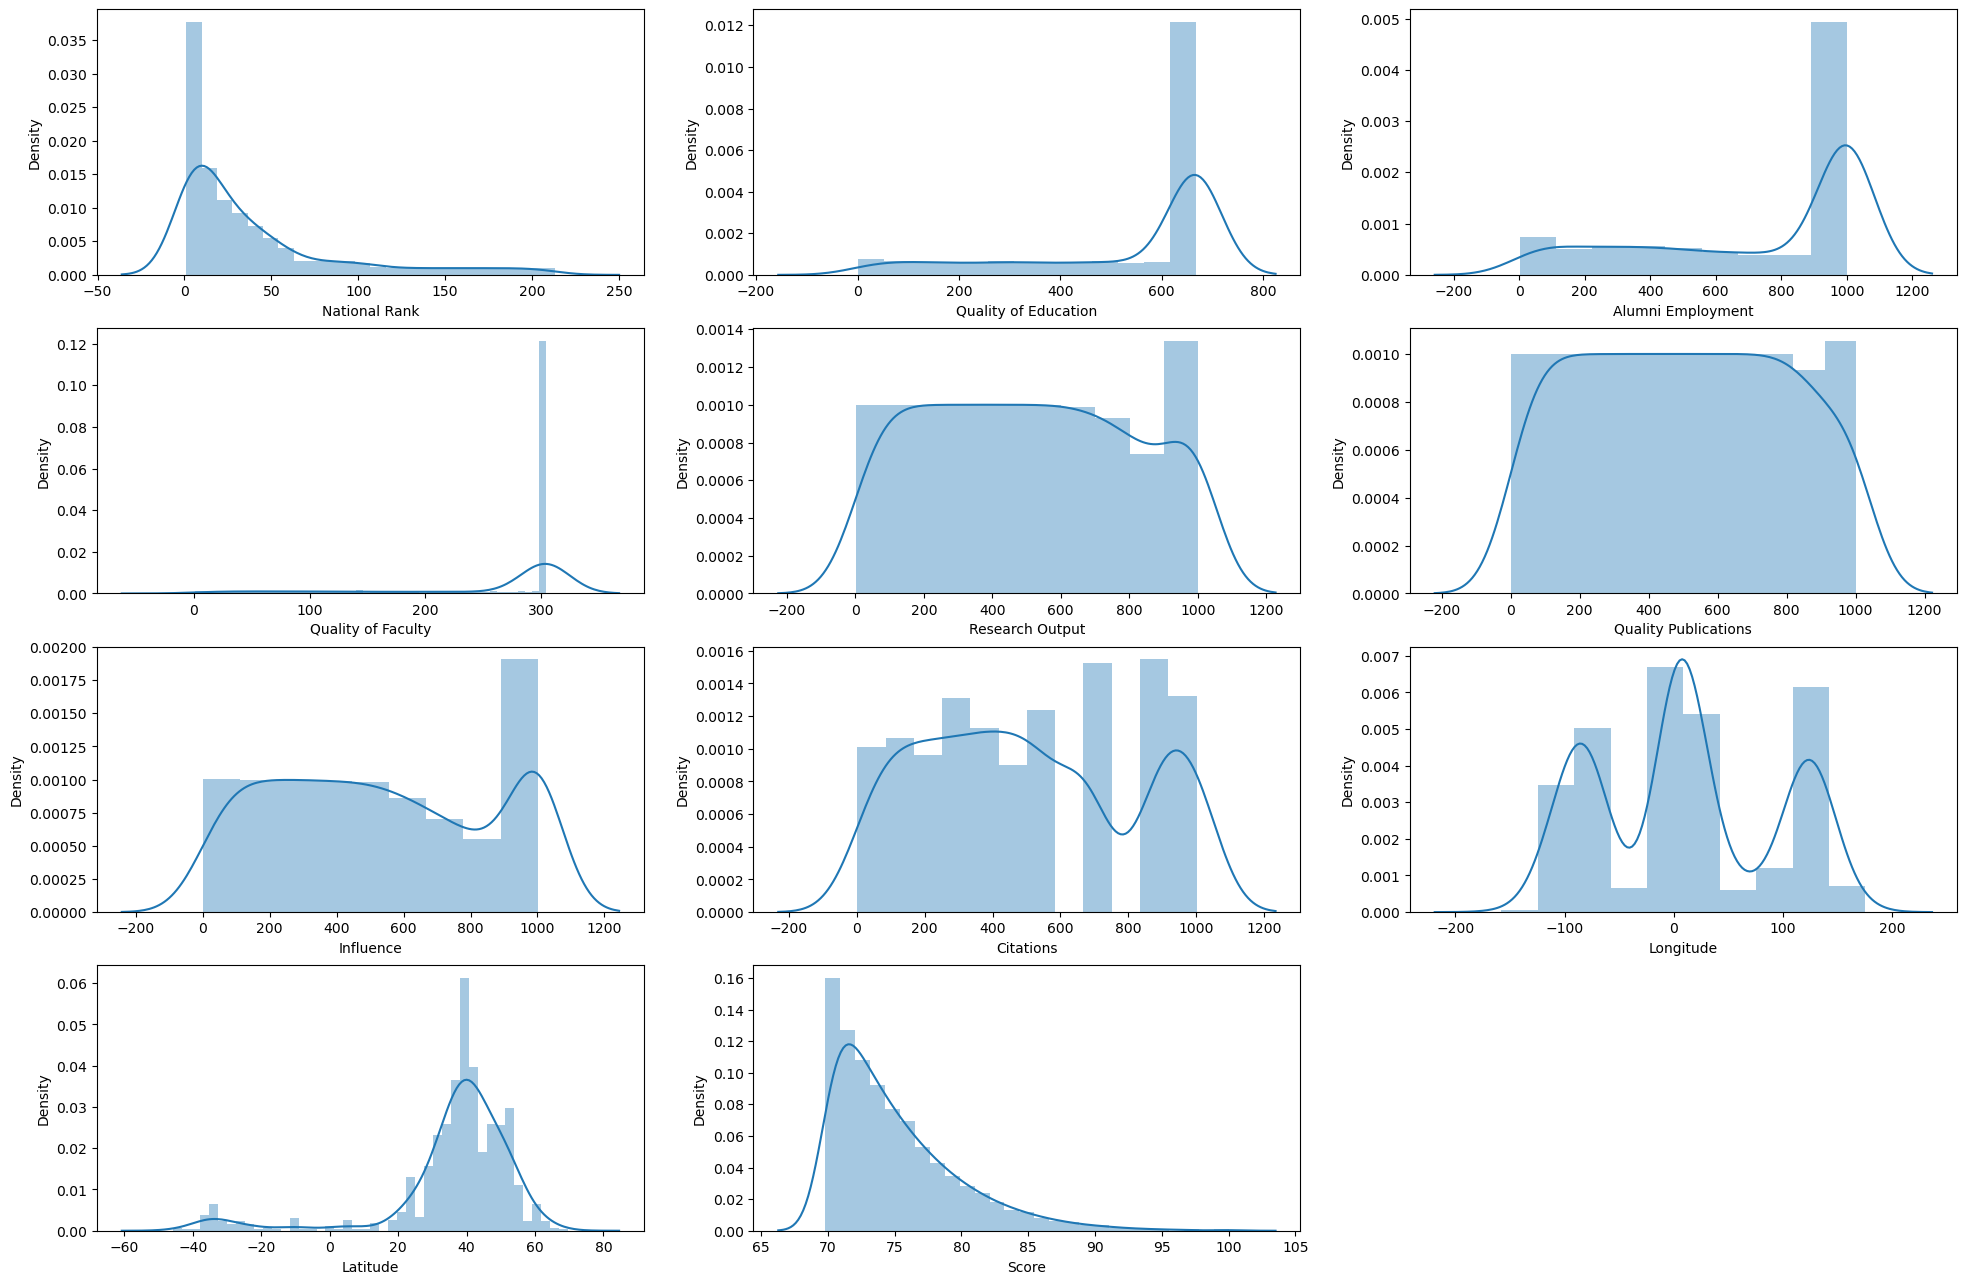

In [28]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]])

Text(0.5, 1.0, 'Correlation Matrix')

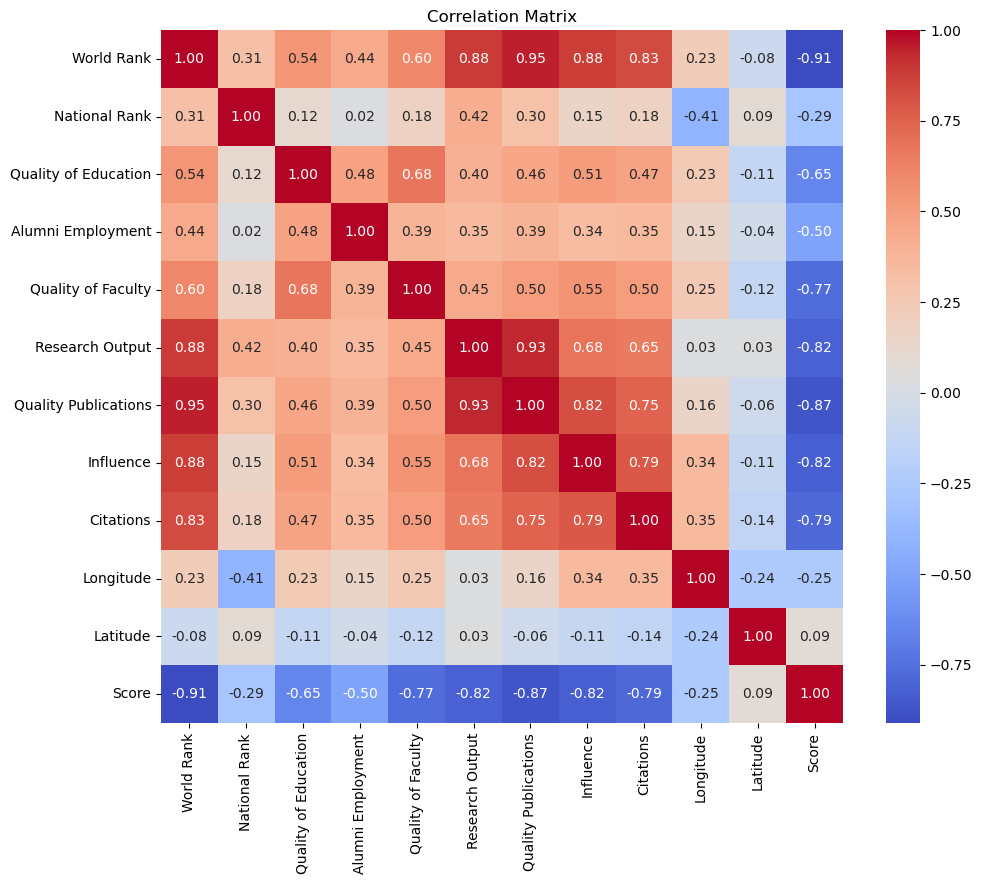

In [29]:
plt.figure(figsize=(11,9))
sns.heatmap(df.drop(columns=['Institution','Location','Country','Continent']).corr(),cmap='coolwarm',  annot=True, fmt=".2f")

plt.title('Correlation Matrix')

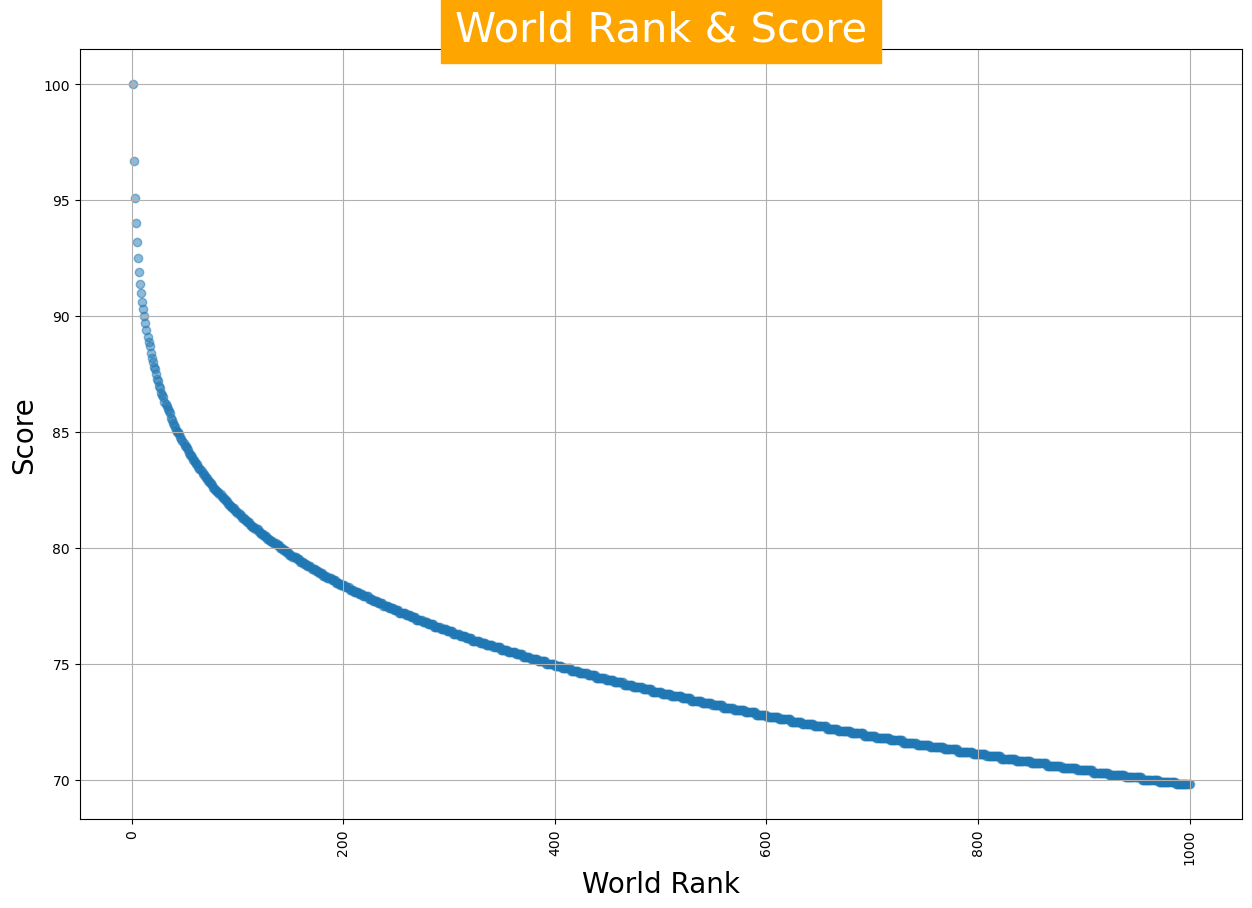

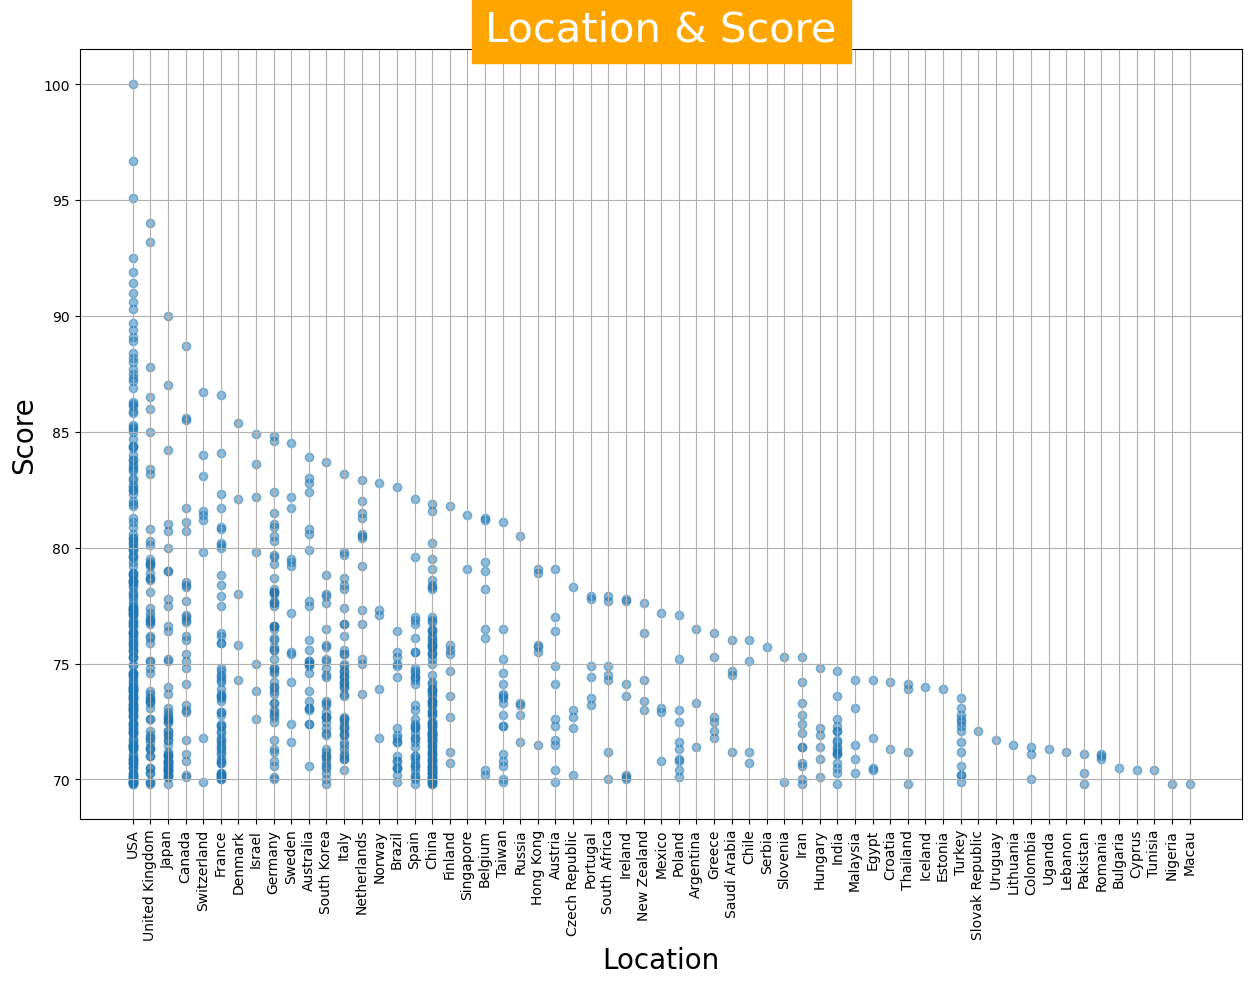

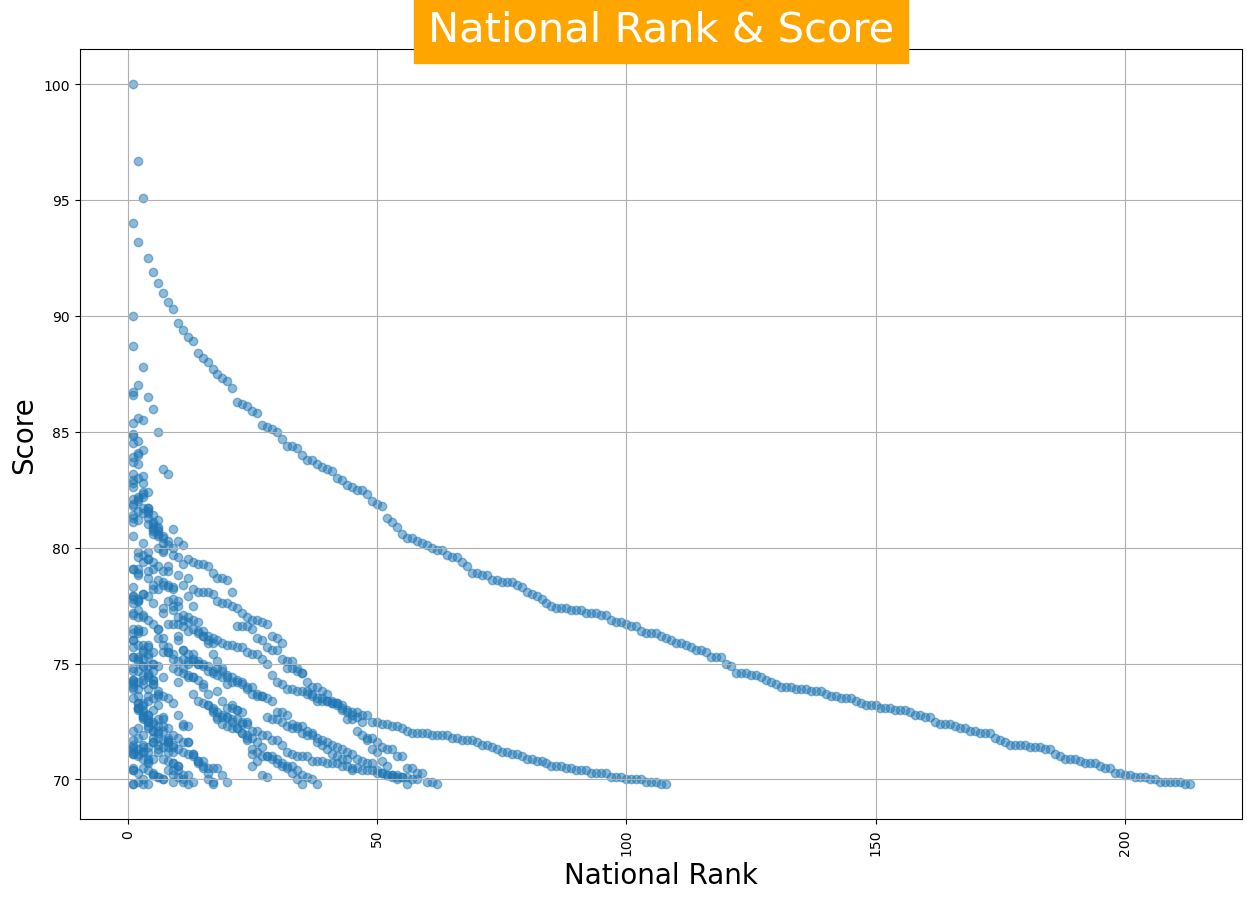

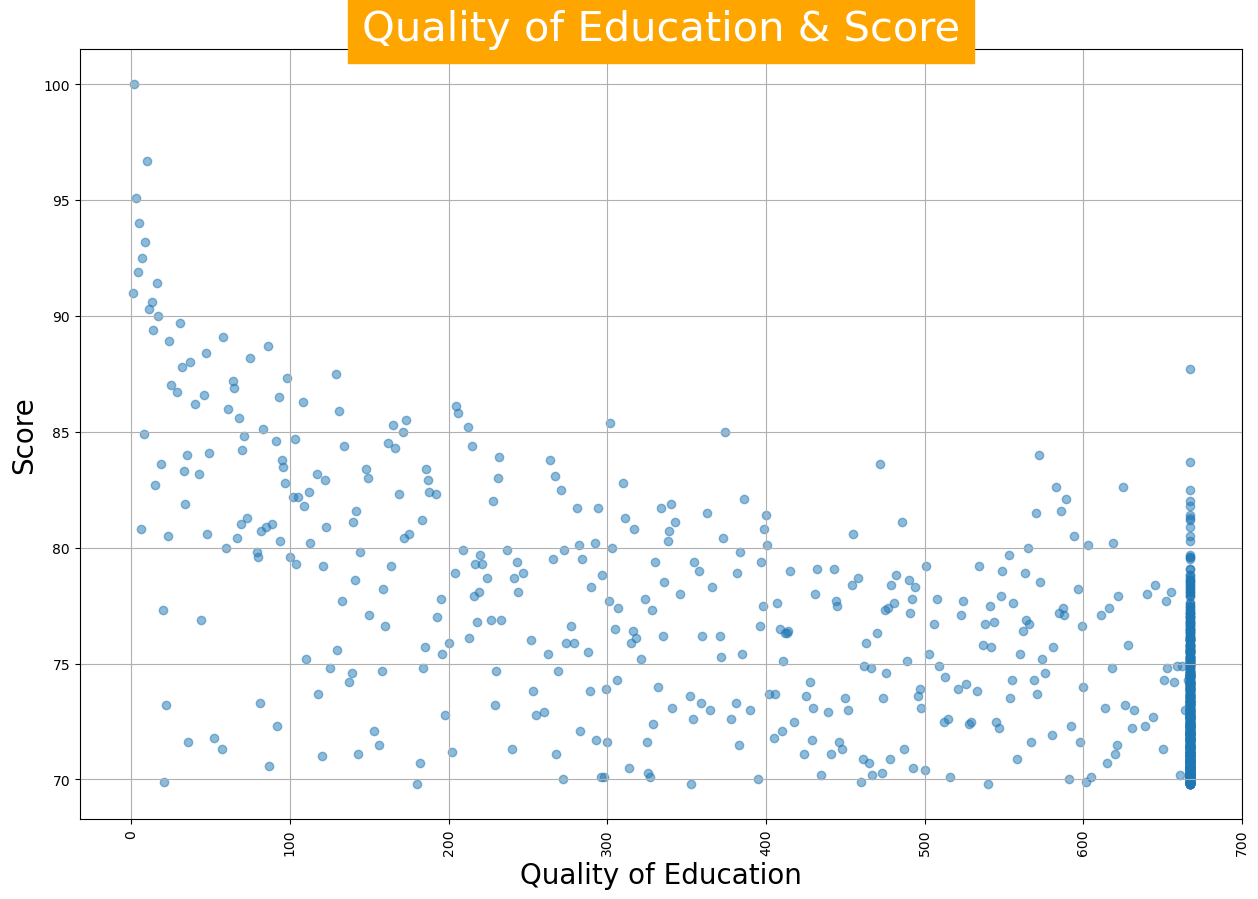

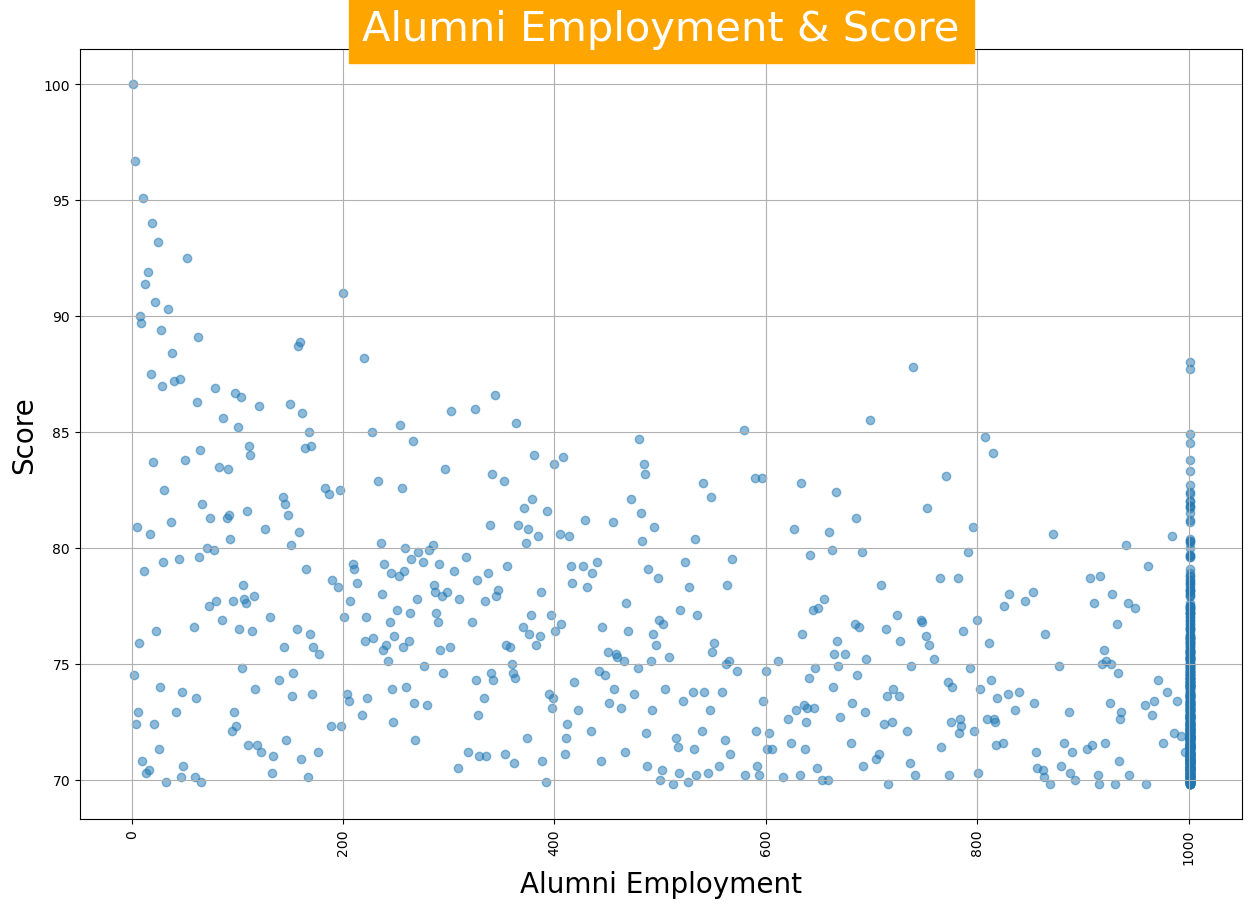

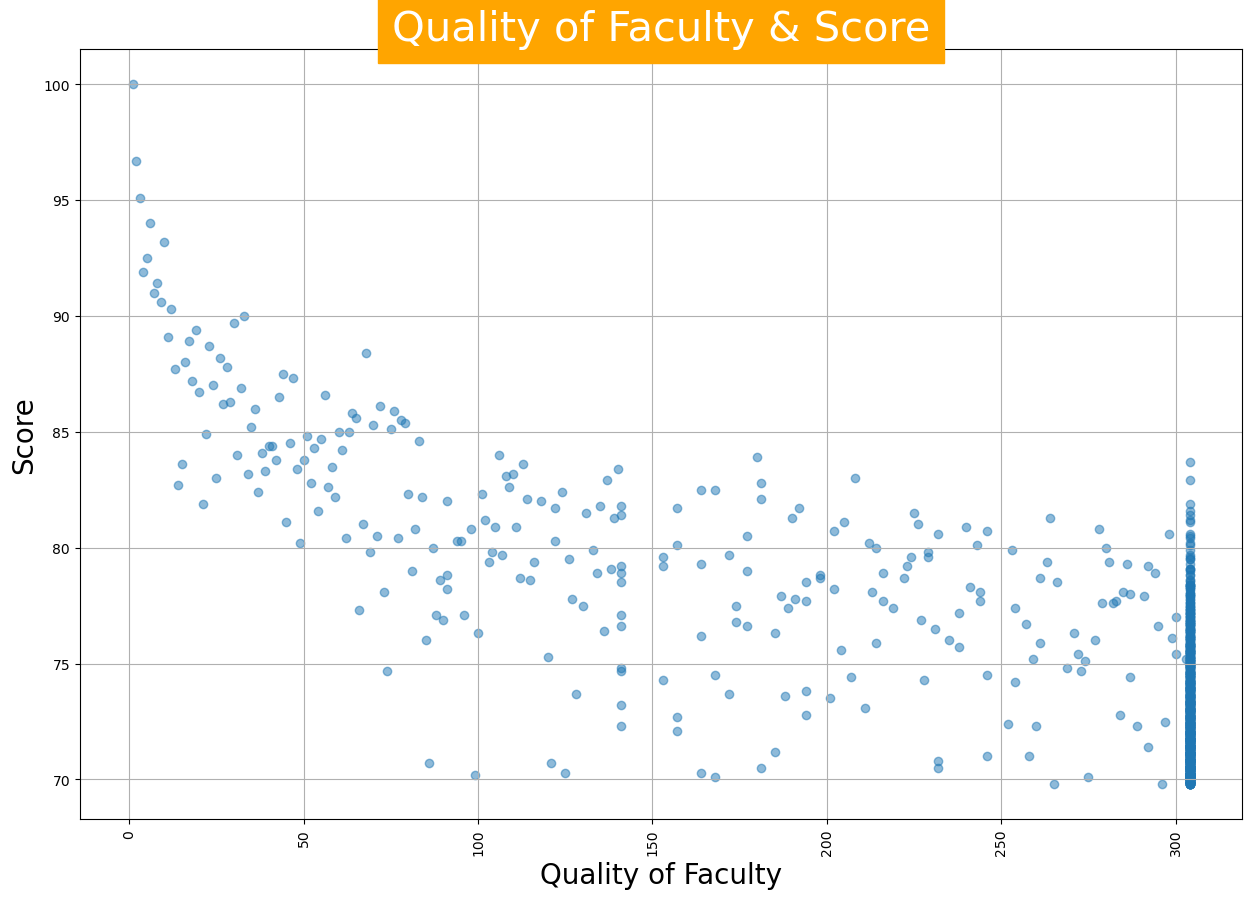

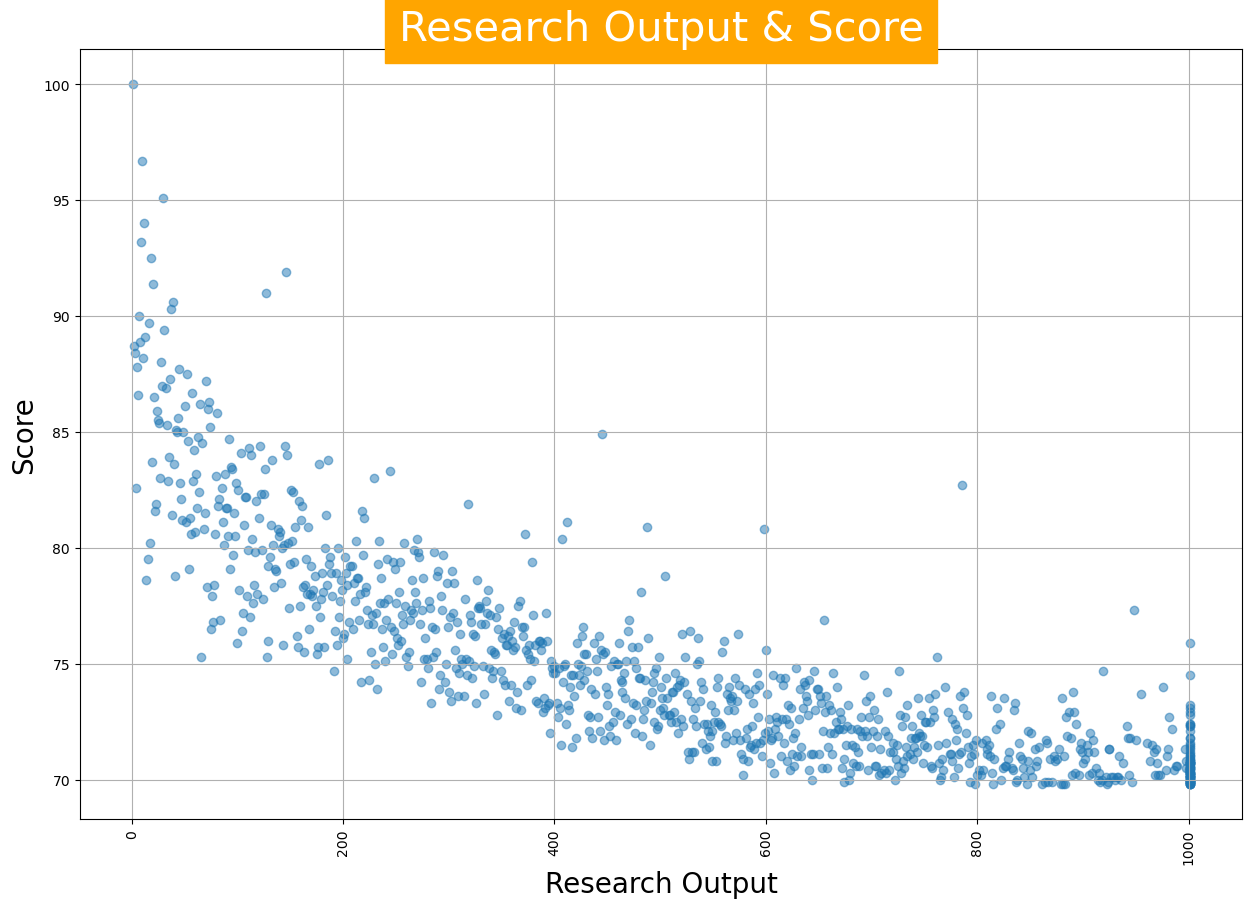

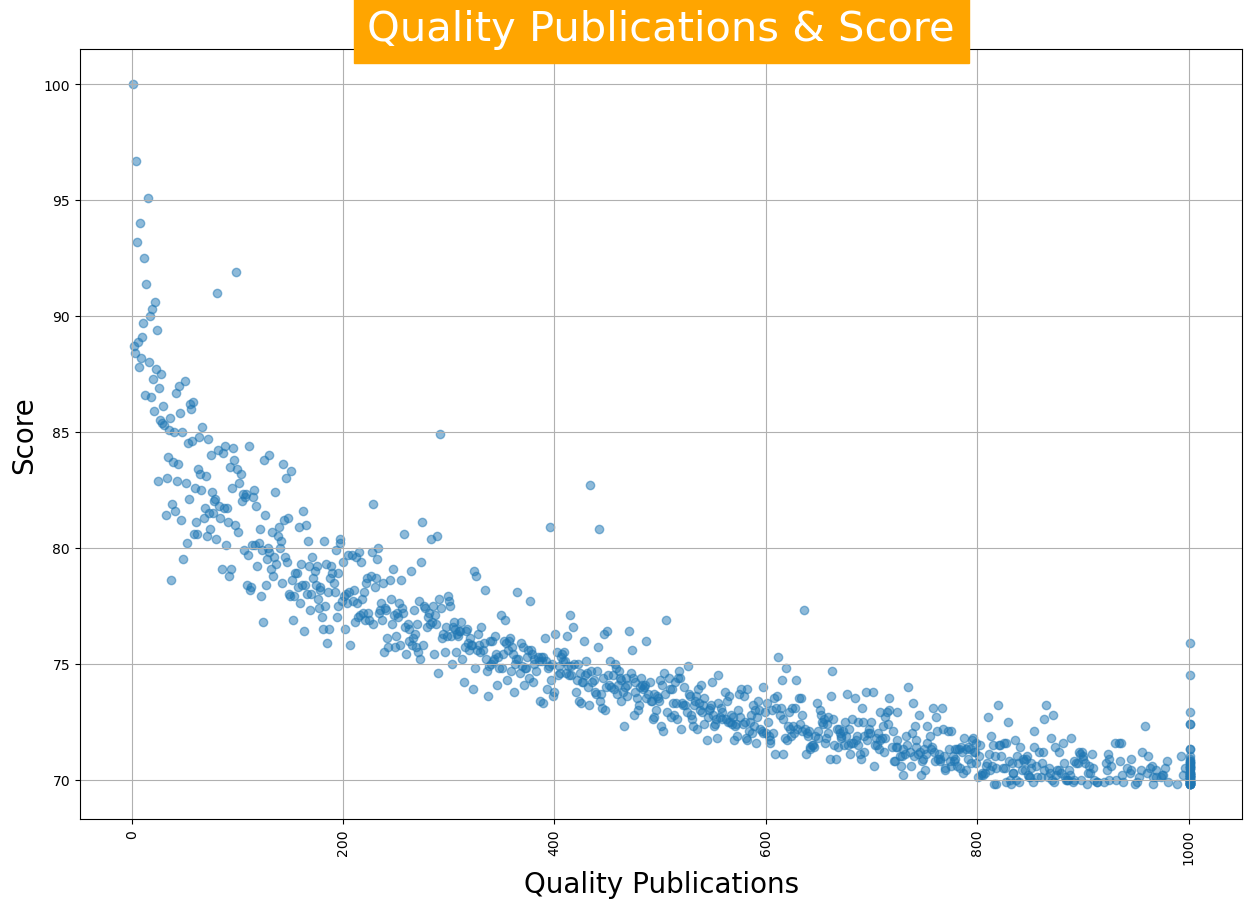

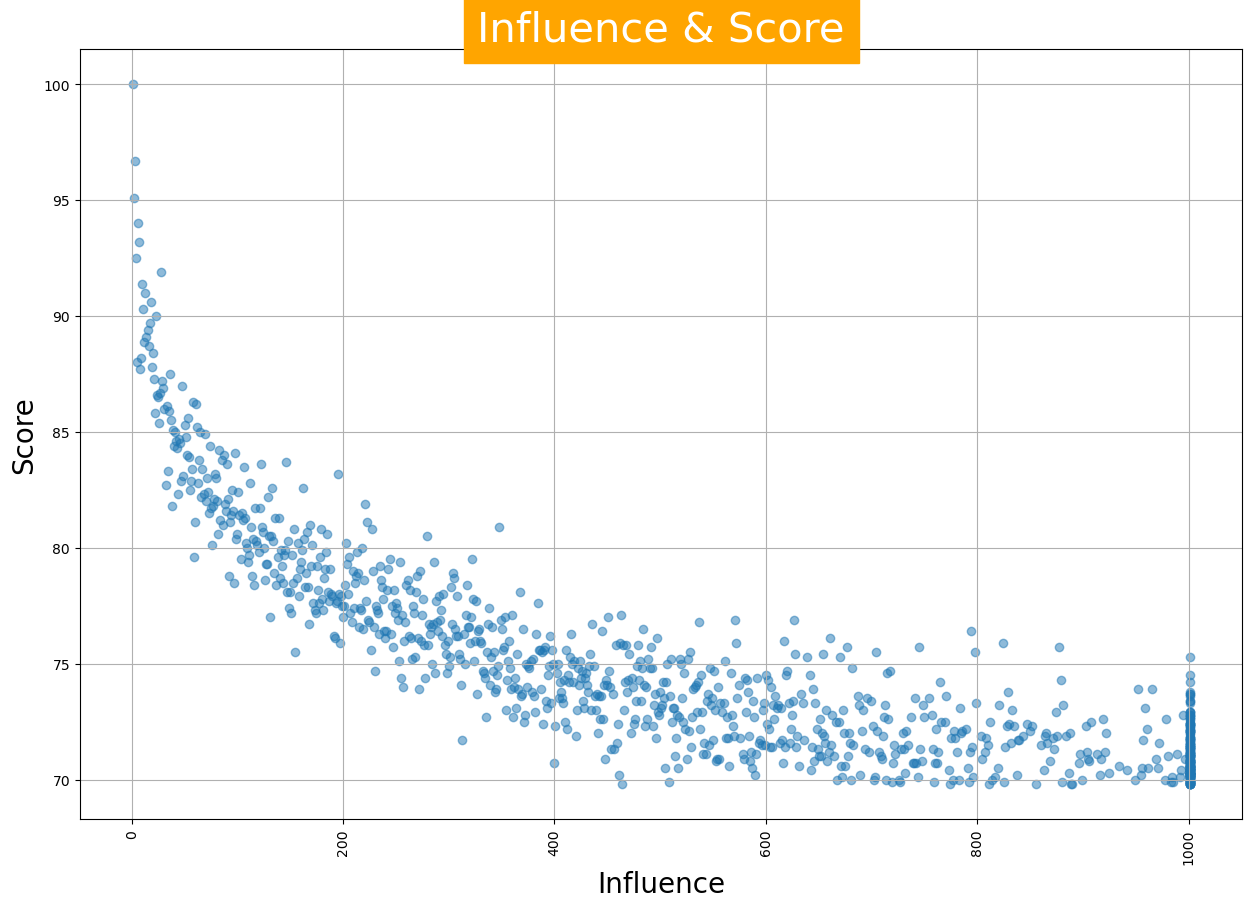

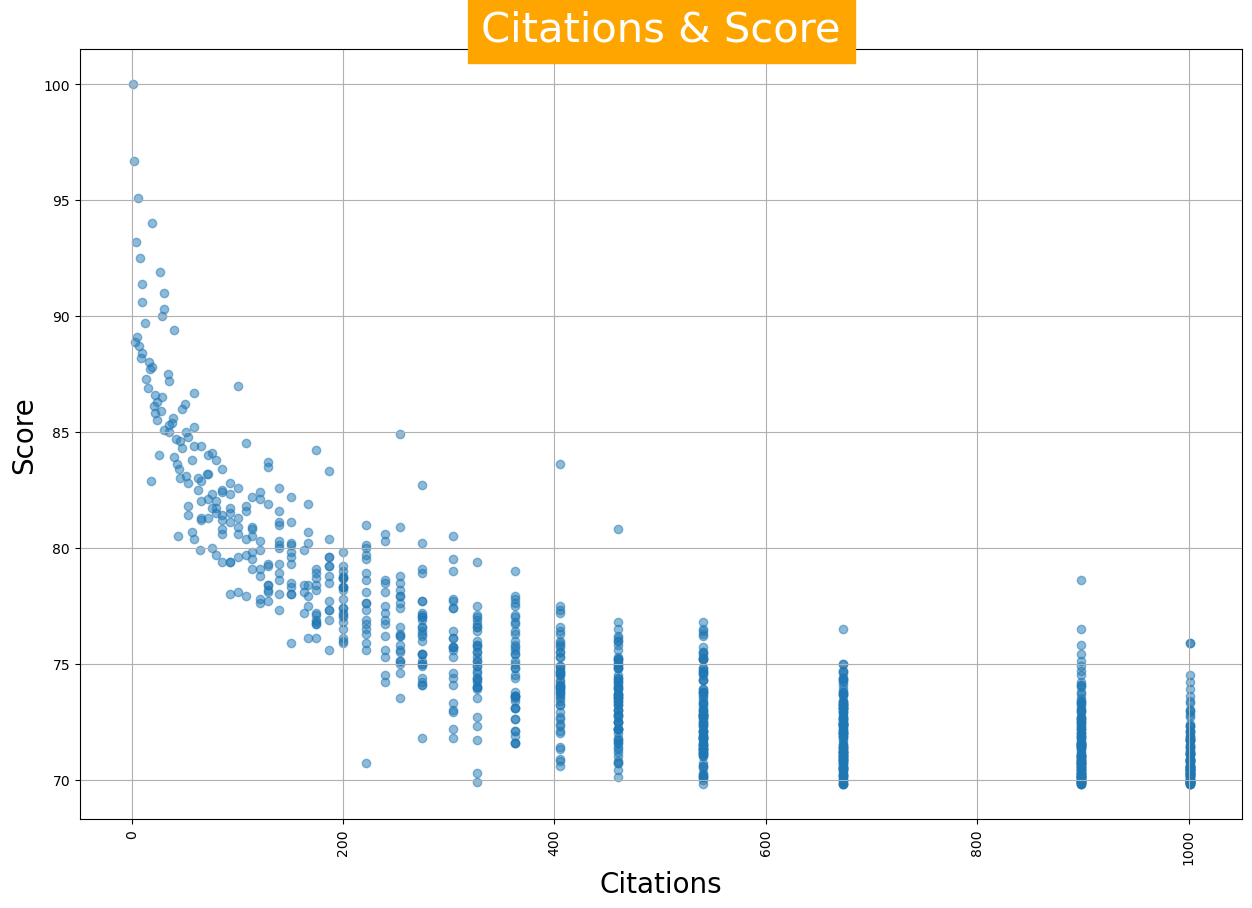

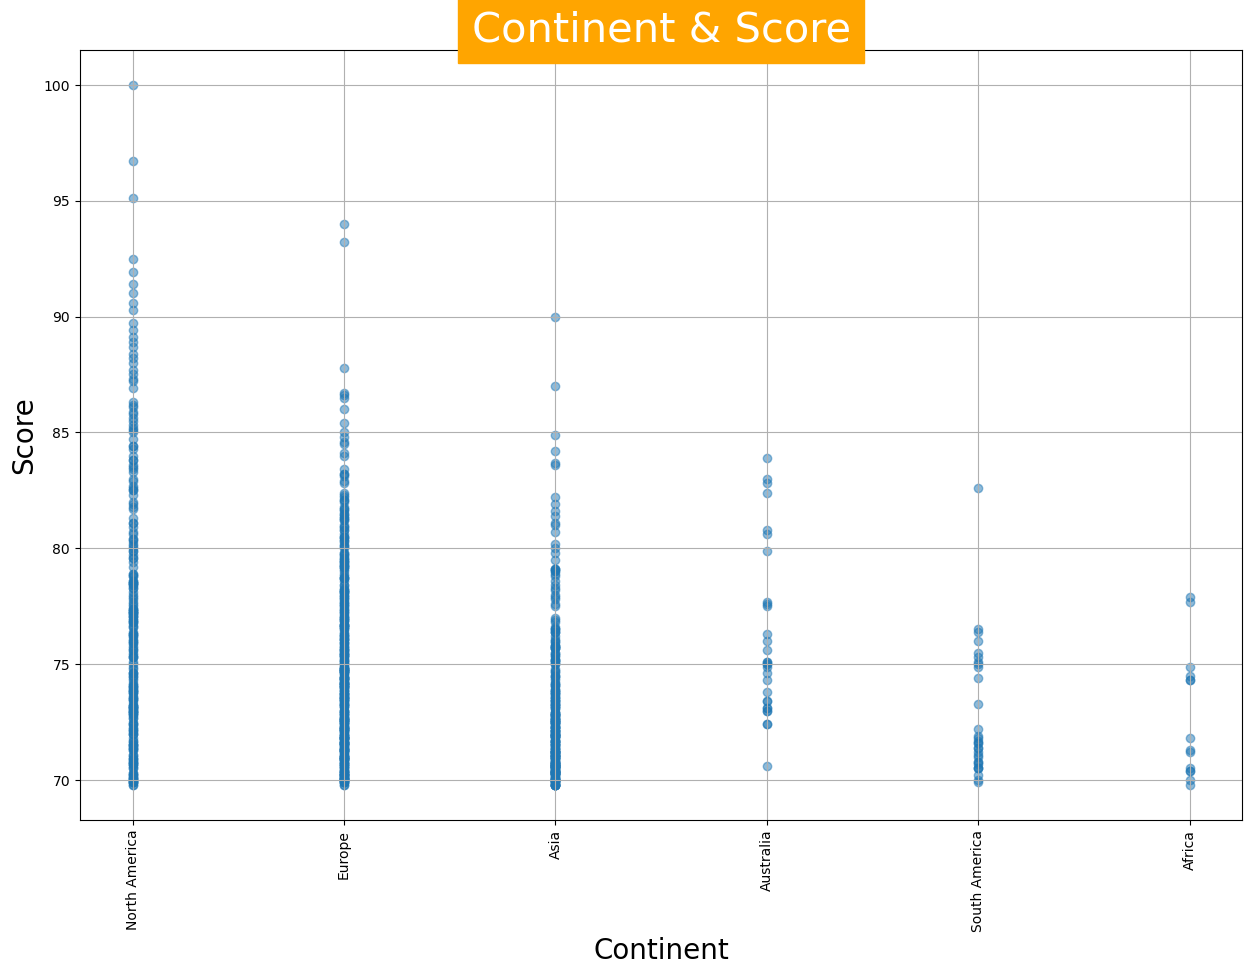

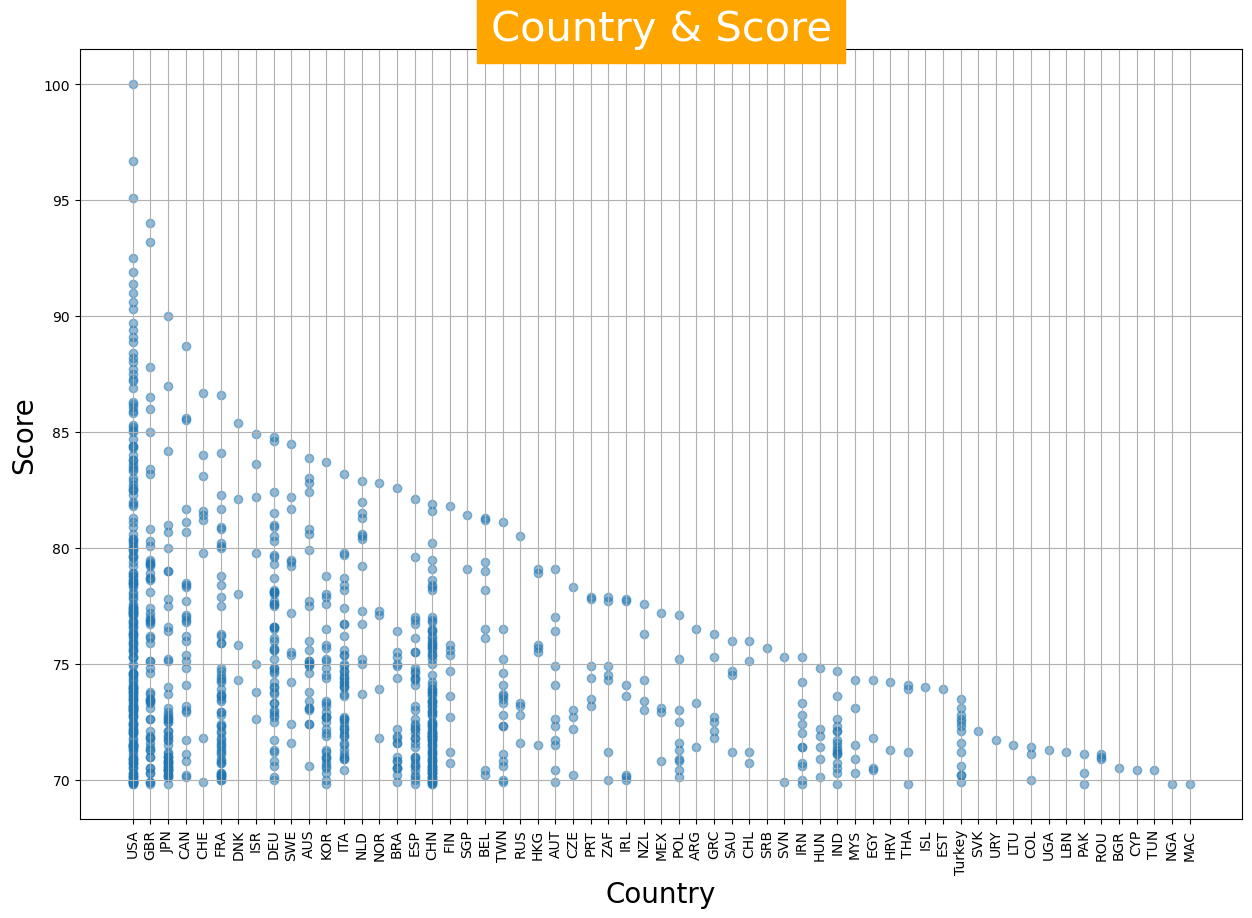

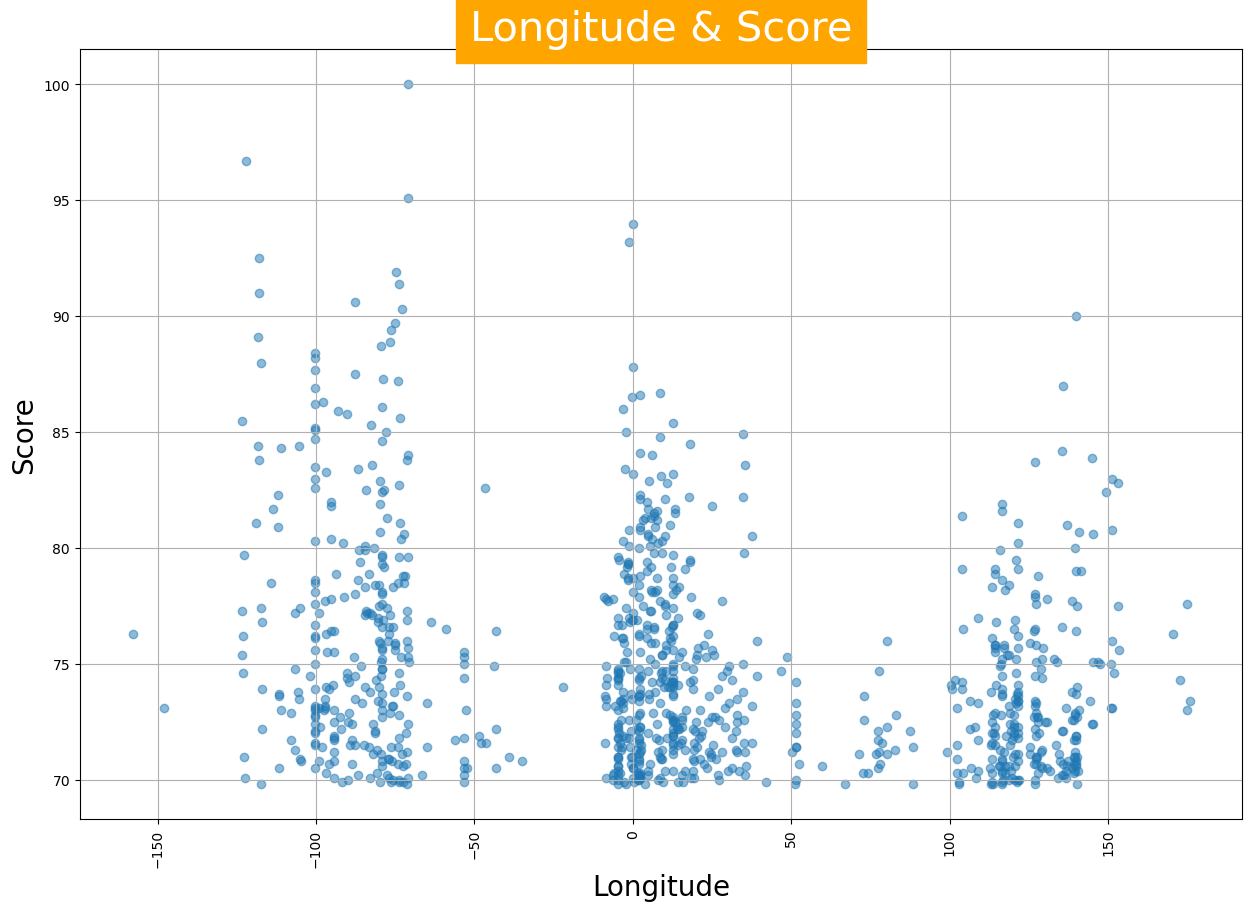

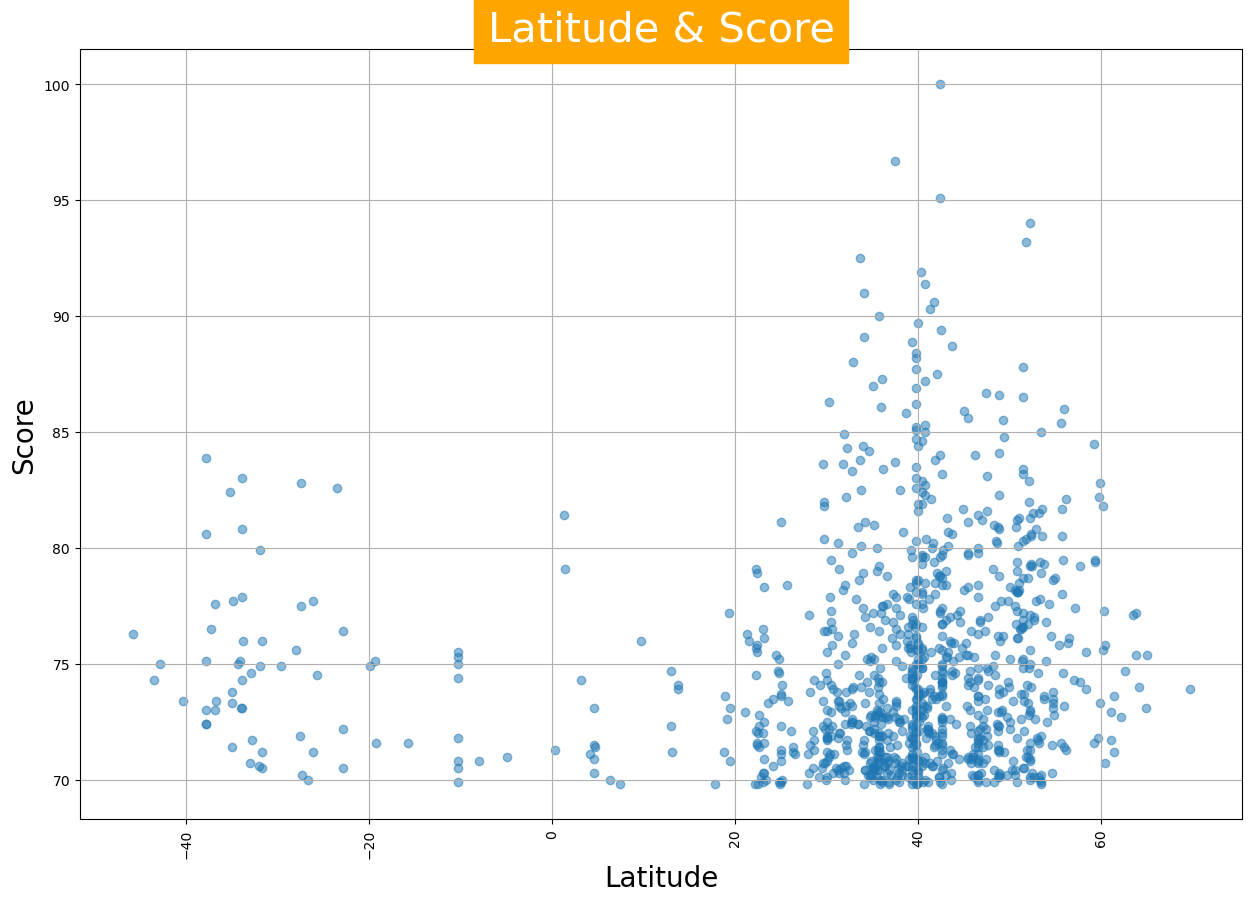

In [30]:
#Scatter plot between all features and score "except Institution".
for column in df.drop(columns=['Score',"Institution",]).columns : 
    plt.figure(figsize=(15,10))
    plt.scatter(df[column],df.Score , alpha=.5 )
    plt.title(column+" & Score",backgroundcolor='orange',color='white',fontsize=30)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Score",fontsize=20)
    plt.grid()
    plt.show()

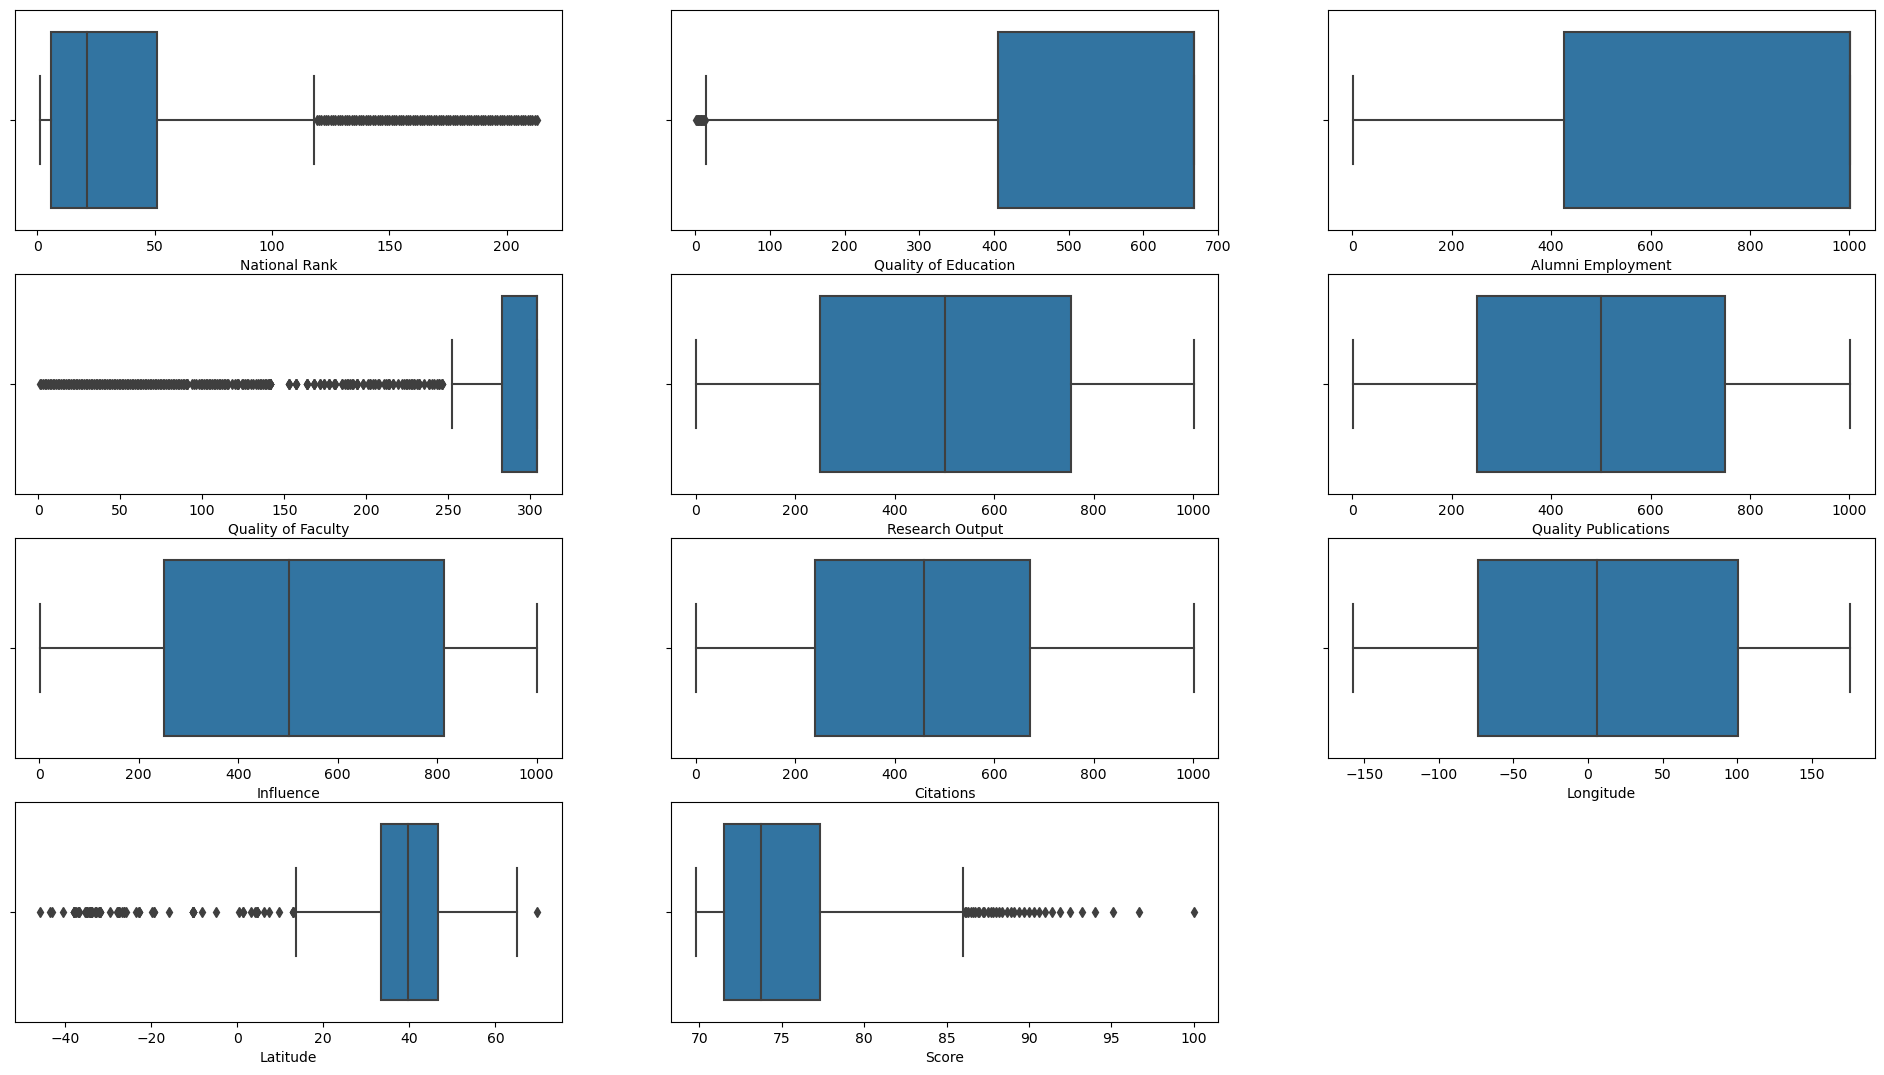

In [31]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(x= i[1], data = df)

In [32]:
#make new dataframe of the first 100 World Rank 
df_100=df[df["World Rank"]<=100] 

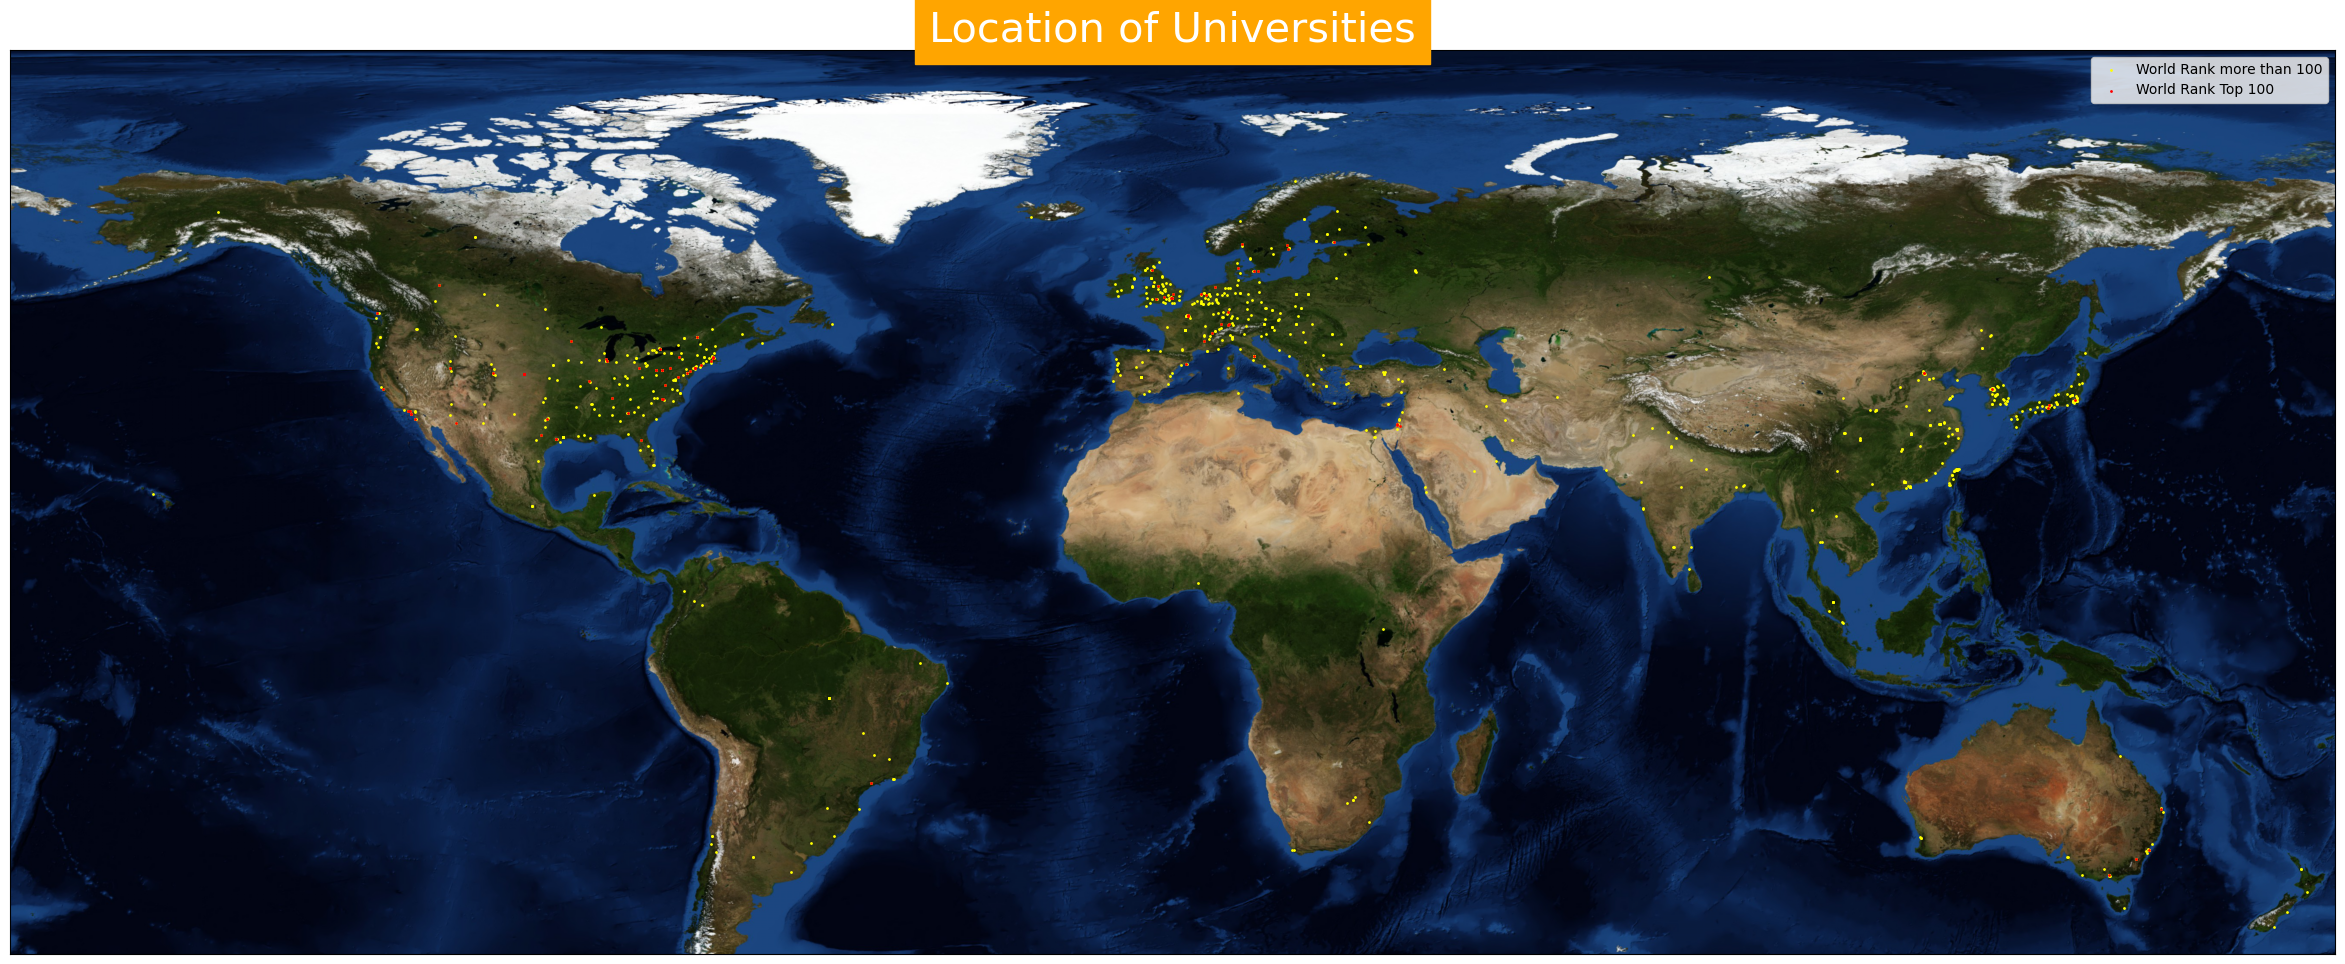

In [33]:
#Map plot
plt.figure(figsize=(30,30)) 
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,lat_ts=90,resolution='c') 
m.bluemarble() 
plt.scatter(df['Longitude'],df['Latitude'],1,marker='o',color='yellow',label='World Rank more than 100') 
plt.scatter(df_100['Longitude'],df_100['Latitude'],1,marker='o',color='Red',label='World Rank Top 100')
plt.title("Location of Universities",backgroundcolor='orange',color='white',fontsize=30)
plt.legend()
plt.show()

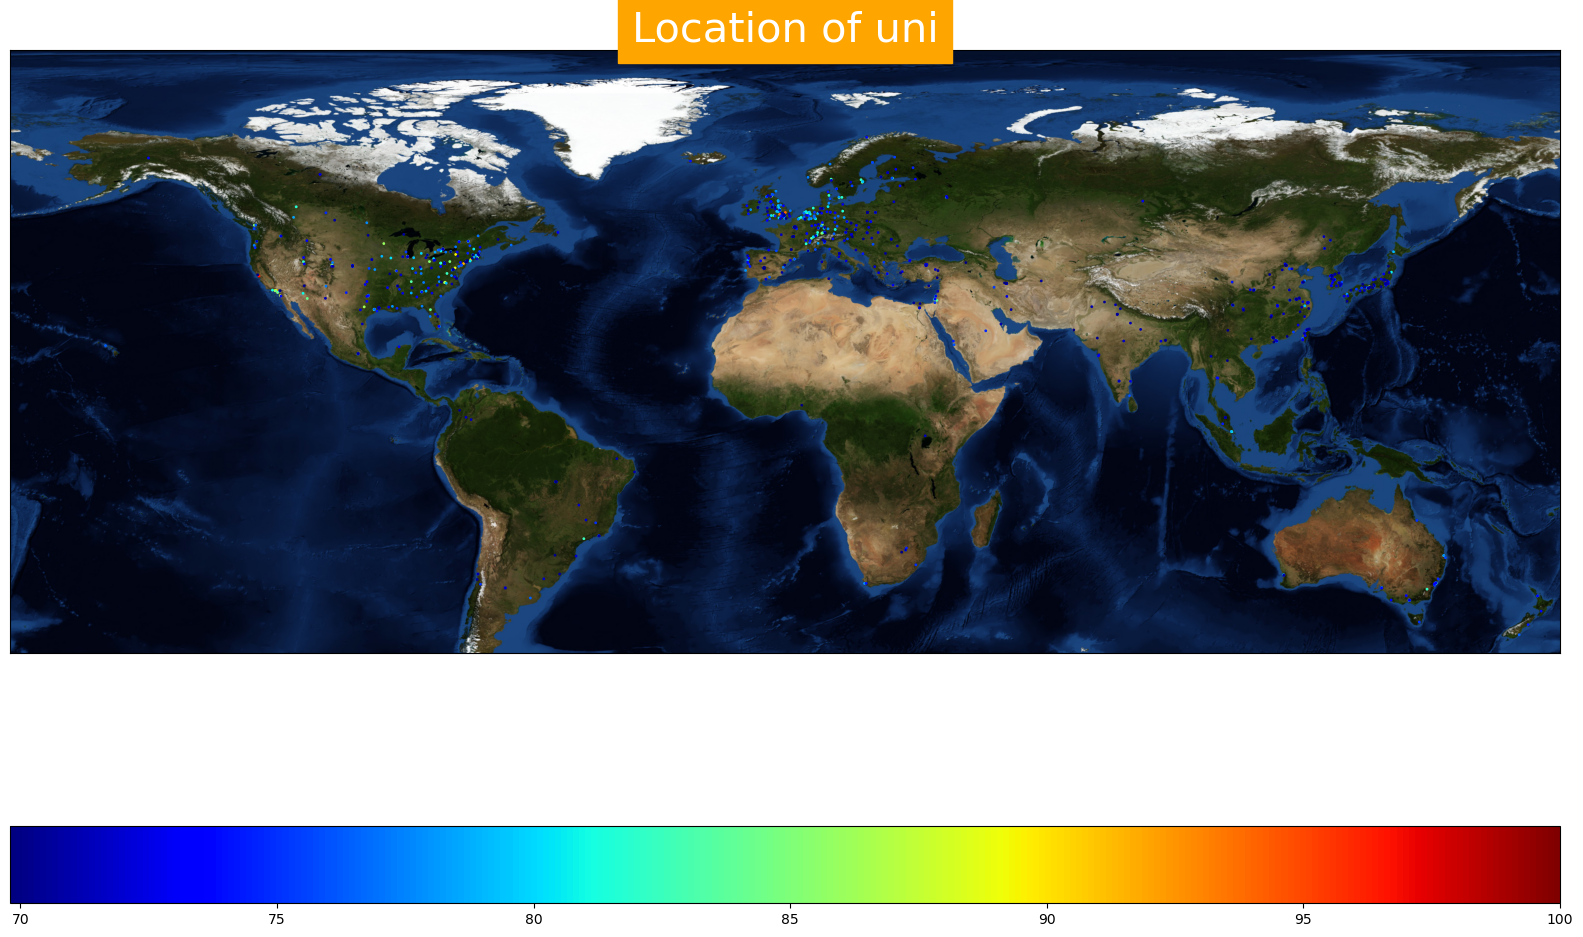

In [34]:
#Map plot
plt.figure(figsize=(20,15)) 
m = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,lat_ts=90,resolution='c')
m.bluemarble()
plt.scatter(df['Longitude'],df['Latitude'],1,marker='o',c=df["Score"],cmap="jet")
plt.title("Location of uni",backgroundcolor='orange',color='white',fontsize=30)
plt.colorbar(location ='bottom')
plt.show()

In [35]:
#Map plot
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', hover_name='Institution',color=df["Score"],
                        hover_data=["Continent","World Rank", "Score"],zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [36]:
df_count= pd.DataFrame({'Location':df.Location.value_counts().index,
                        'Country':df.Country.value_counts().values,
                        'Count':df.Country.value_counts().values})

In [37]:
#Calculate the percentage
df_count["Percentage"]=df_count['Count']/10
df_count

Location  Country  Count  Percentage
0               USA      213    213        21.3
1             China      108    108        10.8
2    United Kingdom       62     62         6.2
3            France       58     58         5.8
4             Japan       56     56         5.6
..              ...      ...    ...         ...
56          Uruguay        1      1         0.1
57  Slovak Republic        1      1         0.1
58          Estonia        1      1         0.1
59          Iceland        1      1         0.1
60            Macau        1      1         0.1

[61 rows x 4 columns]

In [38]:
#Pie plot
labels = df_count.Location
values = df_count.Country

fig = px.pie(values=values,  
             names=labels,
             hole=0.3)

fig.update_traces(textinfo='none')  # Remove percentage labels

fig.update_layout(
    title_text="Count of countries",
    title_x=0.45, 
    title_yanchor="middle"
)

fig.show()

In [39]:
#Pie plot
labels = df.Continent.value_counts().index
values = df.Continent.value_counts().values

fig = px.pie(values=values,  
             names=labels,
             hole=0.3)


fig.update_layout(
    title_text="Count of countries",
    title_x=0.45, 
    title_yanchor="middle"
)

fig.show()